# Kompresi dan Dekompresi Citra JPEG

In [1]:
pip install opencv-python

In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
from matplotlib import image as mpimg
from scipy import fft

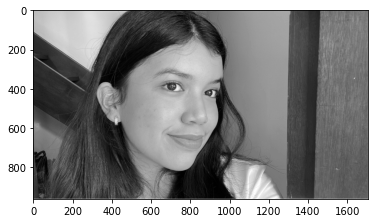

In [3]:
#Original image
img = cv2.imread('C:/Users/Lenovo/Downloads/azmi.jpg',0)
plt.imshow(img, cmap="gray")
plt.show()

## Compression

In [4]:
#Extract Y Component
y_component = img.astype('float')

pd.DataFrame(y_component)

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,192.0,192.0,191.0,189.0,190.0,192.0,191.0,188.0,192.0,193.0,...,124.0,121.0,128.0,128.0,127.0,135.0,134.0,138.0,133.0,151.0
1,184.0,185.0,184.0,184.0,185.0,188.0,188.0,185.0,188.0,188.0,...,117.0,113.0,112.0,116.0,125.0,130.0,122.0,128.0,124.0,144.0
2,184.0,184.0,183.0,183.0,184.0,185.0,184.0,182.0,186.0,186.0,...,111.0,110.0,111.0,115.0,119.0,117.0,116.0,116.0,115.0,137.0
3,186.0,185.0,184.0,184.0,185.0,185.0,184.0,182.0,185.0,185.0,...,105.0,111.0,115.0,119.0,120.0,116.0,121.0,115.0,117.0,142.0
4,183.0,182.0,182.0,183.0,185.0,186.0,185.0,184.0,185.0,183.0,...,107.0,112.0,110.0,116.0,123.0,116.0,114.0,113.0,115.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,65.0,63.0,61.0,61.0,62.0,61.0,58.0,56.0,56.0,55.0,...,97.0,96.0,94.0,99.0,106.0,103.0,100.0,98.0,101.0,126.0
957,60.0,66.0,64.0,57.0,55.0,61.0,62.0,57.0,59.0,59.0,...,96.0,98.0,96.0,96.0,102.0,101.0,101.0,99.0,101.0,126.0
958,65.0,60.0,58.0,60.0,59.0,56.0,57.0,62.0,63.0,68.0,...,99.0,106.0,102.0,96.0,99.0,101.0,104.0,97.0,97.0,120.0
959,61.0,61.0,59.0,57.0,61.0,67.0,66.0,61.0,62.0,63.0,...,94.0,102.0,101.0,98.0,102.0,102.0,102.0,101.0,97.0,117.0


In [5]:
# Mengambil bagian kecil dari komponen gambar dan membaginya menjadi macroblock 8x8 pixel

y_macroblock = []

for i in range(80,88):
    y_macroblock.append(y_component[i][0:8])
y_macroblock = np.array(y_macroblock)

#Tabel warna macroblock komponen Y
pd.DataFrame(y_macroblock)

,0,1,2,3,4,5,6,7
0,182.0,183.0,181.0,182.0,185.0,183.0,182.0,187.0
1,178.0,180.0,181.0,182.0,184.0,182.0,183.0,188.0
2,179.0,181.0,182.0,182.0,182.0,180.0,181.0,185.0
3,181.0,182.0,182.0,182.0,182.0,181.0,181.0,182.0
4,181.0,180.0,179.0,181.0,182.0,185.0,185.0,183.0
5,183.0,181.0,180.0,180.0,181.0,184.0,185.0,182.0
6,183.0,183.0,183.0,181.0,178.0,181.0,184.0,183.0
7,179.0,181.0,183.0,181.0,176.0,180.0,186.0,187.0


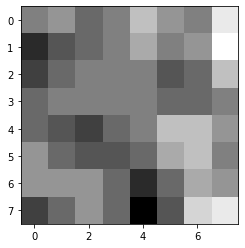

In [6]:
plt.imshow(y_macroblock, cmap="gray")
plt.show()

In [7]:
#Dikurang 128 karena DCT bekerja pada rentang -128 sampai 127
y_macroblock1 = y_macroblock-128

pd.DataFrame(y_macroblock1)

,0,1,2,3,4,5,6,7
0,54.0,55.0,53.0,54.0,57.0,55.0,54.0,59.0
1,50.0,52.0,53.0,54.0,56.0,54.0,55.0,60.0
2,51.0,53.0,54.0,54.0,54.0,52.0,53.0,57.0
3,53.0,54.0,54.0,54.0,54.0,53.0,53.0,54.0
4,53.0,52.0,51.0,53.0,54.0,57.0,57.0,55.0
5,55.0,53.0,52.0,52.0,53.0,56.0,57.0,54.0
6,55.0,55.0,55.0,53.0,50.0,53.0,56.0,55.0
7,51.0,53.0,55.0,53.0,48.0,52.0,58.0,59.0


In [8]:
#Transform Coding - DCT
img_dct = fft.dct(y_macroblock1)
pd.DataFrame(img_dct)

,0,1,2,3,4,5,6,7
0,882.0,-11.537736,4.460885,-1.448314,9.899495,-13.286452,-0.317025,-0.503210
1,868.0,-26.496025,0.000000,-11.274999,8.485281,-8.942752,0.000000,1.691817
2,856.0,-9.547142,0.000000,-13.900776,5.656854,-5.886482,0.000000,0.984795
3,858.0,0.812509,-1.847759,-4.014690,1.414214,-2.682530,-0.765367,0.161618
4,864.0,-19.294861,2.613126,11.505589,-2.828427,3.581549,-1.082392,-3.240724
5,864.0,-9.524929,8.921770,12.181085,-5.656854,5.733761,-0.634051,0.144556
6,864.0,1.729884,15.230414,-6.866382,-8.485281,7.730750,-0.185709,-1.447693
7,858.0,-18.722936,19.691299,-22.793025,-9.899495,10.403967,-0.502734,-2.384778


In [9]:
 #Tabel Kuantisasi
quantization_table = np.matrix(
'16 11 10 16 24 40 51 61;\
 12 12 14 19 26 58 60 55;\
 14 13 16 24 40 57 69 56;\
 14 17 22 29 51 87 80 62;\
 18 22 37 56 68 109 103 77;\
 24 35 55 64 81 104 103 92;\
 49 64 78 77 103 121 120 101;\
 72 92 95 98 112 100 103 99').astype('float')
quantization_table = np.array(quantization_table.tolist())
pd.DataFrame(quantization_table)

,0,1,2,3,4,5,6,7
0,16.0,11.0,10.0,16.0,24.0,40.0,51.0,61.0
1,12.0,12.0,14.0,19.0,26.0,58.0,60.0,55.0
2,14.0,13.0,16.0,24.0,40.0,57.0,69.0,56.0
3,14.0,17.0,22.0,29.0,51.0,87.0,80.0,62.0
4,18.0,22.0,37.0,56.0,68.0,109.0,103.0,77.0
5,24.0,35.0,55.0,64.0,81.0,104.0,103.0,92.0
6,49.0,64.0,78.0,77.0,103.0,121.0,120.0,101.0
7,72.0,92.0,95.0,98.0,112.0,100.0,103.0,99.0


In [10]:
# Transform Coding - Quantization
for i in range(8):
     for j in range(8):
        img_dct[i][j] = round(img_dct[i][j]/quantization_table[i][j])
pd.DataFrame(img_dct)

,0,1,2,3,4,5,6,7
0,55.0,-1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
1,72.0,-2.0,0.0,-1.0,0.0,-0.0,0.0,0.0
2,61.0,-1.0,0.0,-1.0,0.0,-0.0,0.0,0.0
3,61.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
4,48.0,-1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
5,36.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
6,18.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
7,12.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0


## Decompression

In [11]:
#Nilai warna kemudian dikalikan lagi dengan tabel kuantisasi
img_idct = img_dct
for i in range(8):
    for j in range(8):
        img_idct[i][j] = round(img_dct[i][j]*quantization_table[i][j])
pd.DataFrame(img_idct)

,0,1,2,3,4,5,6,7
0,880.0,-11.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
1,864.0,-24.0,0.0,-19.0,0.0,-0.0,0.0,0.0
2,854.0,-13.0,0.0,-24.0,0.0,-0.0,0.0,0.0
3,854.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
4,864.0,-22.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
5,864.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
6,882.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
7,864.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0


In [12]:
# Transform Coding - Invers DCT
# Nilai warna kemudian dihitung lagi dengan rumus Invers DCT dan dibulatkan
img_idct = fft.idct(img_dct)
for i in range(8):
     for j in range(8):
        img_idct[i][j] = round(img_idct[i][j])
pd.DataFrame(img_idct)

,0,1,2,3,4,5,6,7
0,54.0,54.0,54.0,55.0,55.0,56.0,56.0,56.0
1,49.0,52.0,55.0,55.0,53.0,53.0,56.0,59.0
2,49.0,53.0,55.0,55.0,52.0,51.0,54.0,57.0
3,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
4,51.0,52.0,52.0,53.0,55.0,56.0,56.0,57.0
5,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0
6,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
7,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0


In [13]:
#Nilai warna kemudian ditambahkan kembali dengan nilai 128
img_idct += 128
pd.DataFrame(img_idct)

,0,1,2,3,4,5,6,7
0,182.0,182.0,182.0,183.0,183.0,184.0,184.0,184.0
1,177.0,180.0,183.0,183.0,181.0,181.0,184.0,187.0
2,177.0,181.0,183.0,183.0,180.0,179.0,182.0,185.0
3,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0
4,179.0,180.0,180.0,181.0,183.0,184.0,184.0,185.0
5,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0
6,183.0,183.0,183.0,183.0,183.0,183.0,183.0,183.0
7,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0


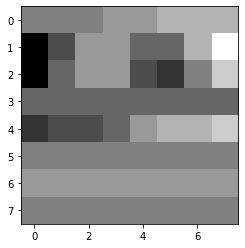

In [14]:
plt.imshow(img_idct, cmap="gray")
plt.show()

## Perbandingan nilai warna sebelum dan sesudah kompresi

In [15]:
before = y_macroblock
after = img_idct

### Before

In [16]:
pd.DataFrame(before)

,0,1,2,3,4,5,6,7
0,182.0,183.0,181.0,182.0,185.0,183.0,182.0,187.0
1,178.0,180.0,181.0,182.0,184.0,182.0,183.0,188.0
2,179.0,181.0,182.0,182.0,182.0,180.0,181.0,185.0
3,181.0,182.0,182.0,182.0,182.0,181.0,181.0,182.0
4,181.0,180.0,179.0,181.0,182.0,185.0,185.0,183.0
5,183.0,181.0,180.0,180.0,181.0,184.0,185.0,182.0
6,183.0,183.0,183.0,181.0,178.0,181.0,184.0,183.0
7,179.0,181.0,183.0,181.0,176.0,180.0,186.0,187.0


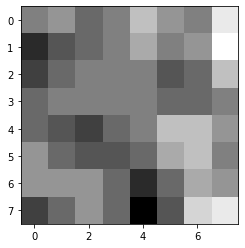

In [17]:
plt.imshow(y_macroblock, cmap="gray")
plt.show()

### After

In [18]:
pd.DataFrame(after)

,0,1,2,3,4,5,6,7
0,182.0,182.0,182.0,183.0,183.0,184.0,184.0,184.0
1,177.0,180.0,183.0,183.0,181.0,181.0,184.0,187.0
2,177.0,181.0,183.0,183.0,180.0,179.0,182.0,185.0
3,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0
4,179.0,180.0,180.0,181.0,183.0,184.0,184.0,185.0
5,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0
6,183.0,183.0,183.0,183.0,183.0,183.0,183.0,183.0
7,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0


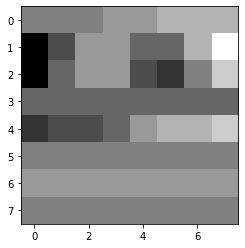

In [19]:
plt.imshow(img_idct, cmap="gray")
plt.show()